# Redes Neurais

In [1]:
import pickle
from typing import List, Tuple

import numpy as np
import pandas as pd

import tensorflow as tf

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.base import clone, BaseEstimator

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt

2022-10-21 18:21:34.475589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-21 18:21:34.583752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/gurobi912/linux64/lib
2022-10-21 18:21:34.583768: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-21 18:21:34.612576: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-21 18:21:35.15

## MNIST

### Loading Dataset

In [2]:
with open('../aula01/mnist.pkl', 'rb') as bunch:
    mnist = pickle.load(bunch)

In [3]:
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy().astype('uint8')


In [4]:
X/=255

In [5]:
X = np.array([x.reshape(28, 28) for x in X])

In [6]:
X.shape

(70000, 28, 28)

In [7]:
split_threshold = 60_000


In [8]:
X_train, X_test = X[:split_threshold], X[split_threshold:]
y_train, y_test = y[:split_threshold], y[split_threshold:]

## Treinando um classificador binário
Vamos teinar um classificador que verifica apenas se uma imagem
é o número 5 ou não



In [9]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [10]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [11]:
# transformando em classes: 0 e 1
y_train_5 = np.asarray(y_train_5).astype(np.int8)
y_test_5 = np.asarray(y_test_5).astype(np.int8)

In [12]:
y_test_5[22:26]

array([0, 1, 0, 0], dtype=int8)

In [13]:
y_test_5.shape

(10000,)

In [14]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
y_train_5.shape

(60000,)

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

2022-10-21 18:21:36.889472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/gurobi912/linux64/lib
2022-10-21 18:21:36.889498: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-21 18:21:36.889540: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vinicius-desktop): /proc/driver/nvidia/version does not exist
2022-10-21 18:21:36.889763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 265,802
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train_5, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1163 - accuracy: 0.9591

Grafico do erro quadratico medio e da acuracia

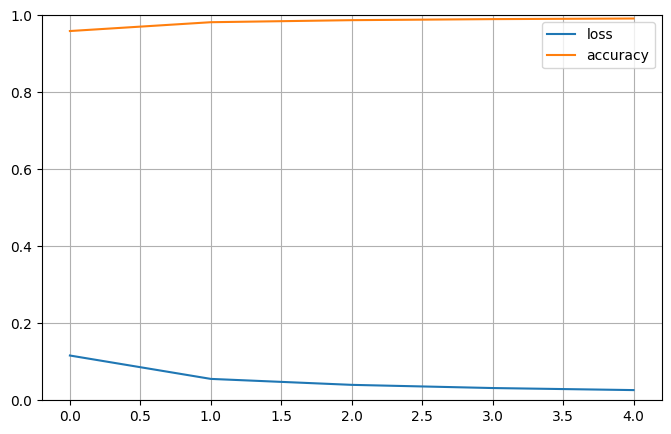

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
X_test[0].shape

(28, 28)

In [23]:
# prediz as probabilidades
model.predict(X_test[:3])

1/1 [==============================] - 0s 65ms/step


array([[9.9924612e-01, 7.5395155e-04],
       [9.9312580e-01, 6.8741934e-03],
       [9.9533588e-01, 4.6641440e-03]], dtype=float32)

In [24]:
# transformando em numeros inteiros
model.predict(X_test[:3]).round(2).astype(np.int8)

1/1 [==============================] - 0s 16ms/step


array([[1, 0],
       [0, 0],
       [1, 0]], dtype=int8)

In [25]:
y_test_5[:3]

array([0, 0, 0], dtype=int8)

In [26]:
model.predict([X_test[22:25]]).round().astype(np.int8)

1/1 [==============================] - 0s 45ms/step


array([[1, 0],
       [0, 1],
       [1, 0]], dtype=int8)

In [27]:
# funcao para transformar de volta em classes 0 e 1
def my_one_hot_decode(data: List[np.array], labels: list):
    res = []
    for d in data:
        res.append(labels[d.argmax()])
    return np.array(res)

In [28]:
p = model.predict([X_test]).round().astype(np.int8)
y_test_predict = my_one_hot_decode(p, [0, 1])

313/313 [==============================] - 0s 1ms/step


In [29]:
y_test_5[22:26]

array([0, 1, 0, 0], dtype=int8)

In [30]:
y_test_predict[22:26]

array([0, 1, 0, 0])

In [31]:
accuracy_score(y_test_5, y_test_predict)

0.9915

In [32]:
precision_score(y_test_5, y_test_predict)

0.9498327759197325

In [33]:
recall_score(y_test_5, y_test_predict)

0.9551569506726457

In [34]:
f1_score(y_test_5, y_test_predict)

0.9524874231414198

redes convolucionais

In [35]:

model_conv = keras.models.Sequential([
    keras.layers.Conv2D(16, 5,
                        activation="relu",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation="softmax")
])

In [36]:
model_conv.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [37]:
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)        

In [38]:
history = model_conv.fit(X_train, y_train_5, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2081 - accuracy: 0.9254

Grafico do erro quadratico medio e da acuracia

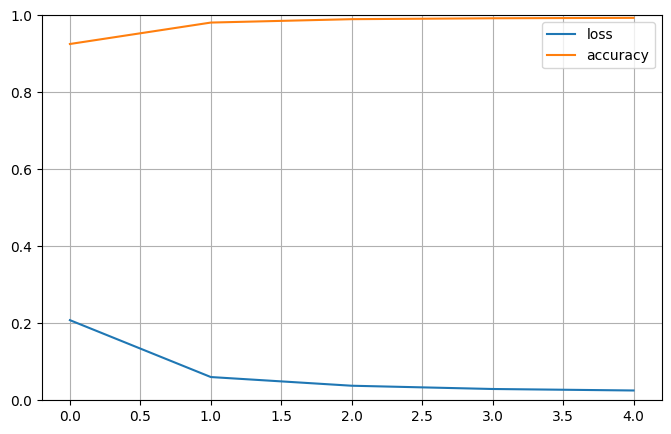

In [39]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [40]:
p = model_conv.predict([X_test]).round().astype(np.int8)
y_test_predict = my_one_hot_decode(p, [0, 1])

313/313 [==============================] - 1s 3ms/step


In [41]:
y_test_5[22:26]

array([0, 1, 0, 0], dtype=int8)

In [42]:
y_test_predict[22:26]

array([0, 1, 0, 0])

In [43]:
accuracy_score(y_test_5, y_test_predict)

0.9966

In [44]:
precision_score(y_test_5, y_test_predict)

0.9831081081081081

In [45]:
recall_score(y_test_5, y_test_predict)

0.9786995515695067

In [46]:
f1_score(y_test_5, y_test_predict)


0.9808988764044944